# DAY 18

### UNSUPERVISED MACHINE LEARNING

##### => WHEN WE TRAINED OUR UNLABELLED DATA , THAT'S TYPE OF MODEL IS CONSIDERED AS UNSUPERVISED MODEL

## 1. K-MEANS 

-> CLUSTERING ===> GROUPING

-> BACKEND ===> METHOD ELBOW METHOD -----> WCSS (WITHIN CLUSTOR SUM OF SQUARED ERROR)

ERROR ---> DISTANCE B/W ACUTUAL MINUS PREDICTION DIFFERENCE

VISUALIZE ===> JIS POINT PAR POINT JADA BEND HO RAHI HOGE bho best number of cluster hoge

ELBOW METHOD FOR LOOP

In [66]:
import numpy as np
import pandas as pd


In [67]:
df=pd.read_csv('mall.csv')

In [68]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df=df.drop(columns=['CustomerID','Genre'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


loc(range of )
iloc()

In [70]:
x=df.iloc[:,[0,1]].values
# print(x)

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### kmeans inertia ====> error ===> 
 

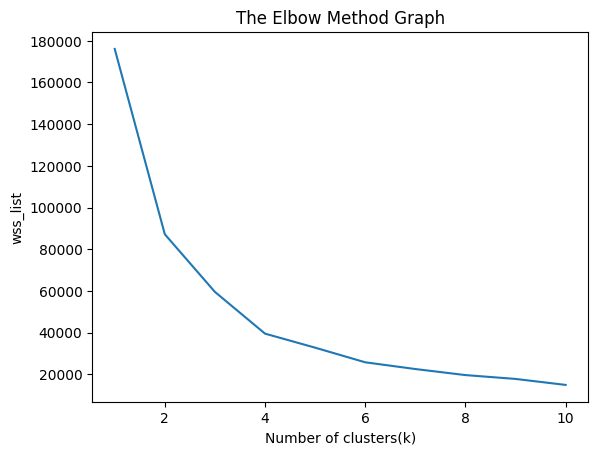

In [72]:
a=[]
for i in range(1,11):
    b=KMeans(n_clusters=i,init='k-means++',random_state=42) # init='k-means++' or dbscan
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11),a)

plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wss_list')

plt.show()

In [73]:
#from the above plot, we can the elbow point is at k=4, so we will choose k=4
y_predict=b.fit_predict(x)

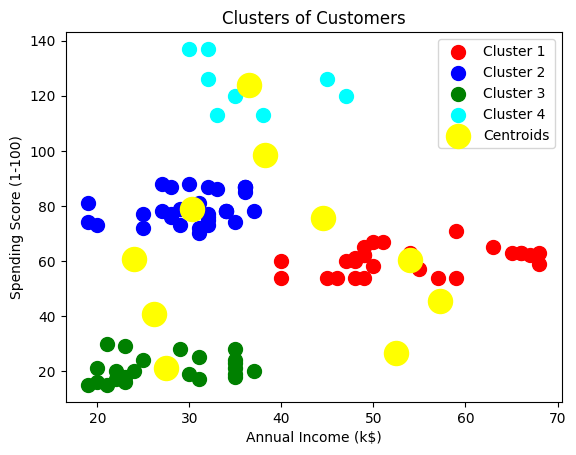

In [74]:
# visualize the clusters
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='red',label='Cluster 1') #for first cluster 
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='blue',label='Cluster 2') #for second cluster
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='green',label='Cluster 3') #for third cluster
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='cyan',label='Cluster 4') #for fourth cluster

plt.scatter(b.cluster_centers_[:,0],b.cluster_centers_[:,1],s=300,c='yellow',label='Centroids') #for centroids
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

## 2. PCA (PRINCIPAL COMPONENT ANALYSIS)

=> IT WILL CONVERT HIGHER DIMENSIONAL DATA TO LOWER DIMENSIONAL DATA

=> egion value and egion matrix of the data

=> DATA IN 2D OR 3D CAN BE VISUALIZED EASILY

top to fatures ==> n_components 

In [75]:
import numpy as np
import pandas as pd

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
df=pd.read_csv('Social_Network_Ads.csv')


In [77]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [78]:
df=df.drop(columns=['User ID','Gender'])

In [79]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##### pipelines process

data ingustion=> train=> model prediction => solution

In [81]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),    
    ('classifier',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [82]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [83]:
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])


In [84]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [85]:
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])


In [86]:
y_pred= pipe.predict(x_test)

In [87]:
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy : {acc}')

Accuracy : 0.8875


# learn logs file making